# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [27]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 42.2MB/s]


In [28]:
data = pd.read_csv('./train.csv')

In [29]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [30]:
# смотрим на случайнык строки
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1412,10,26.1,225.55,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
3442,46,19.4,958.15,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
5140,53,18.7,1005.7,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
124,67,94.1,6302.8,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),0
3539,7,35.3,264.8,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0


In [31]:
# таблица с пропусками
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [33]:
# как видно выше, числовой признак TotalSpent имеет неверный тип, переведем его в числа:
pd.to_numeric(data['TotalSpent'])

ValueError: ignored

In [34]:
# не получилось перевести в числа из-за пробела
data.loc[1048,'TotalSpent']

' '

In [35]:
# заменим пробелы на пропуски
data = data.replace(r'^\s*$', np.nan, regex=True)

In [36]:
data.loc[1048,'TotalSpent']

nan

In [37]:
# теперь снова переведем в числовой формат
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [39]:
# заменим пропуски медианным значением
data.loc[data['TotalSpent'].isna(), 'TotalSpent'] = data['TotalSpent'].median()

## Промежуточный вывод

1) Данные загружены. Выведены случайные строчки таблицы.

2) Значения столбца TotalSpent приведены к числовому типу. Пропуски в этом столбце заполнены медианой. В других столбцах пропусков нет

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Гистограммы по числовым признакам


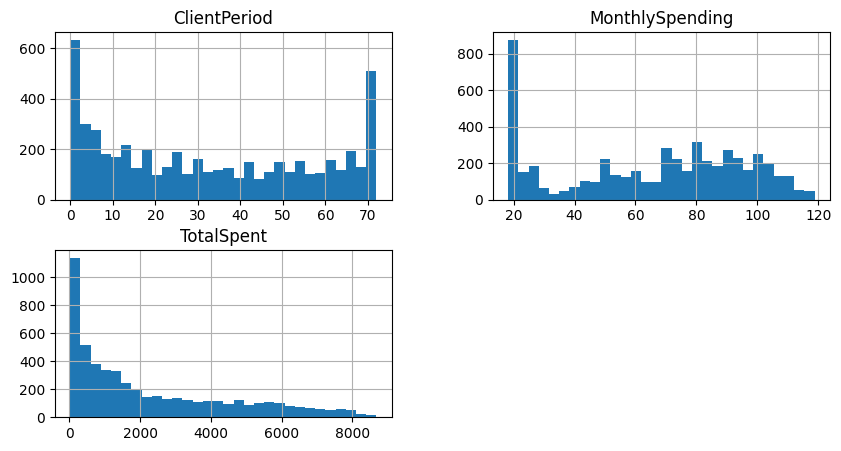

In [40]:
data[num_cols].hist(figsize=(10, 5), bins=30)
print('Гистограммы по числовым признакам')

In [41]:
for i in cat_cols:
  print('\033[1m' + '_'+ str(i) + '\033[0m')
  display(data[i].value_counts())

_Sex


Male      2655
Female    2627
Name: Sex, dtype: int64

_IsSeniorCitizen


0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

_HasPartner


No     2705
Yes    2577
Name: HasPartner, dtype: int64

_HasChild


No     3676
Yes    1606
Name: HasChild, dtype: int64

_HasPhoneService


Yes    4761
No      521
Name: HasPhoneService, dtype: int64

_HasMultiplePhoneNumbers


No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

_HasInternetService


Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

_HasOnlineSecurityService


No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

_HasOnlineBackup


No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

_HasDeviceProtection


No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

_HasTechSupportAccess


No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: int64

_HasOnlineTV


No                     2099
Yes                    2042
No internet service    1141
Name: HasOnlineTV, dtype: int64

_HasMovieSubscription


No                     2081
Yes                    2060
No internet service    1141
Name: HasMovieSubscription, dtype: int64

_HasContractPhone


Month-to-month    2920
Two year          1280
One year          1082
Name: HasContractPhone, dtype: int64

_IsBillingPaperless


Yes    3148
No     2134
Name: IsBillingPaperless, dtype: int64

_PaymentMethod


Electronic check             1786
Mailed check                 1194
Bank transfer (automatic)    1159
Credit card (automatic)      1143
Name: PaymentMethod, dtype: int64

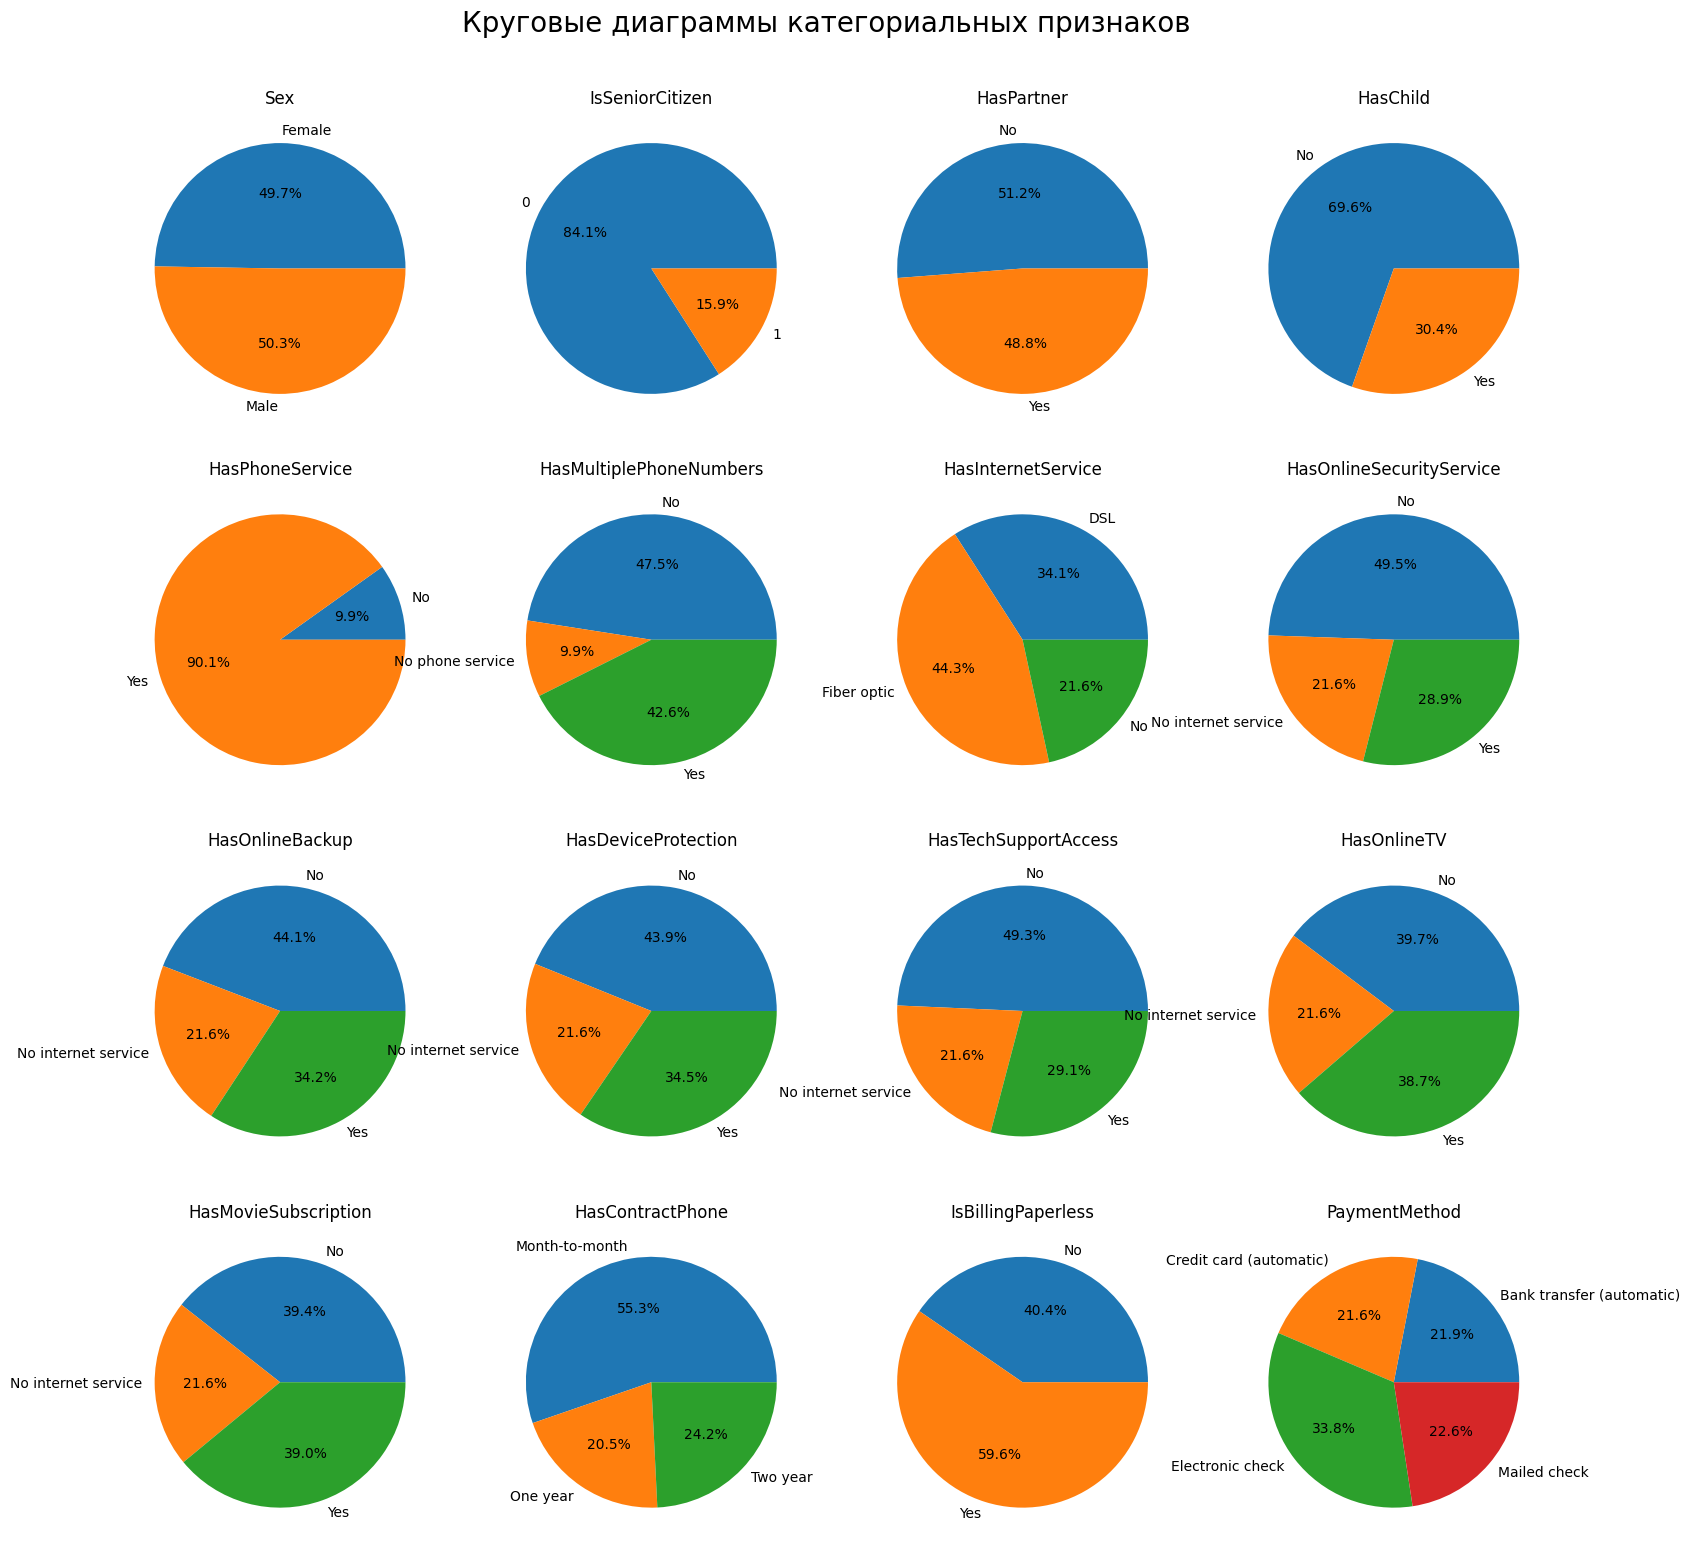

In [42]:
fig, axs = plt.subplots(4, 4, figsize = (15,15))
plt.tight_layout()

count = -1
for i in range(4):
  for x in range(4):
    count+=1
    col = cat_cols[count]
    df = pd.DataFrame(data.groupby([col])[col].count())
    axs[i,x].pie(x=df[col],
                 labels=df.index,
                 autopct='%1.1f%%',)
    axs[i,x].title.set_text(str(col))

plt.suptitle('Круговые диаграммы категориальных признаков', fontsize=20, y=1.05)

plt.show()

Распределение Целевой переменной


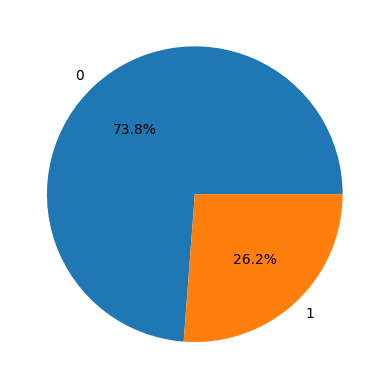

In [43]:
plt.pie(x = data.groupby(target_col)[target_col].count(),
        labels = data.groupby(target_col)[target_col].count().index,
        autopct='%1.1f%%')
print('Распределение Целевой переменной')

## Промежуточные выводы

1) Для численных призанков построены гистограммы. Для категориальных посчитано количество каждого значения для каждого признака и построены круговые диаграммы.

2) ПОстроено аспределение целевой переменной. Классы являются несбалансированными.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [44]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [45]:
# Кодируем категориальные признаки с помощью one-hot-encoding'а
dummy_features = pd.get_dummies(data[cat_cols], drop_first=True)

# созданим датасет с признаками
features = pd.concat([data[num_cols], dummy_features], axis=1)

features.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.90,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570.00,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [46]:
# выделим целевую переменную
target = data[target_col]

In [47]:
RANDOM_STATE = 12345

# будем использовать кроссвалидацию
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

cls = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)
)

# создадим объект GridSearchCV
search = GridSearchCV(cls, param_grid, n_jobs=-1, cv=5, refit=True, scoring='roc_auc')

# запустим поиск
search.fit(features, target)

# выведем наилучшие параметры
print(search.best_params_)

{'logisticregression__C': 10}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [48]:
roc_auc_score(target, search.best_estimator_.predict(features))

0.7669425109067344

0.76 при параметре C = 10

## Промежуточные выводы

1) Категориальные признаки кодированы с помощью one-hot-encoding'а

2) Масштабирование и Логистическая Регрессия выполнены одним пайплайном. ПРотестированы значения гиперпараметра C (С=100, 10, 1, 0.1, 0.01, 0.001). Для учета дисбаланса классов использован class_weight='balanced'

3) Знаение метрики ROC-AUC лучшей модели: 0.76 при параметре C = 10

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [49]:
!pip install catboost --quiet

from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [50]:
# делим выборку, используем stratify = target для учета дисбаланса классов
features_train, features_valid, target_train, target_valid = train_test_split(data.drop(target_col, axis = 1), target,
                                                                            test_size=0.25,
                                                                            stratify = target,
                                                                            random_state=RANDOM_STATE)
print('train:',  features_train.shape, target_train.shape)
print('test:',  features_valid.shape, target_valid.shape)

train: (3961, 19) (3961,)
test: (1321, 19) (1321,)


In [51]:
features_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
4286,5,49.40,232.55,Female,0,Yes,Yes,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check
360,27,95.60,2595.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
3178,58,103.25,6017.65,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic)
3232,41,19.75,806.95,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check
3648,29,20.35,617.35,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check


In [54]:
default_cat_boost = CatBoostClassifier(random_state=RANDOM_STATE)
default_cat_boost.fit(features_train, target_train,verbose=100, cat_features=cat_cols)
predictions = default_cat_boost.predict_proba(features_valid)[:,1]
print('roc_auc:', roc_auc_score(target_valid, predictions))

Learning rate set to 0.018544
0:	learn: 0.6830052	total: 52.7ms	remaining: 52.7s
100:	learn: 0.4125686	total: 3.02s	remaining: 26.9s
200:	learn: 0.3898108	total: 4.31s	remaining: 17.1s
300:	learn: 0.3790715	total: 5.52s	remaining: 12.8s
400:	learn: 0.3711822	total: 6.75s	remaining: 10.1s
500:	learn: 0.3618364	total: 8.1s	remaining: 8.06s
600:	learn: 0.3524566	total: 9.53s	remaining: 6.32s
700:	learn: 0.3431309	total: 12.1s	remaining: 5.16s
800:	learn: 0.3338445	total: 13.9s	remaining: 3.44s
900:	learn: 0.3252919	total: 15.3s	remaining: 1.68s
999:	learn: 0.3173683	total: 16.8s	remaining: 0us
roc_auc: 0.8437601897139471


In [53]:
param = {'depth': [3,5,7],
         'learning_rate': [0.05, 0.01, 0.1]
         }

estimator = CatBoostClassifier(loss_function="Logloss", iterations=500, random_state=RANDOM_STATE)

#подбор параметров и обучение
cat_boost = GridSearchCV(estimator=estimator, param_grid=param, cv=5, n_jobs=4, scoring='roc_auc')
cat_boost.fit(features_train, target_train, verbose=100, cat_features=cat_cols)

# Результат
print('Параметры:', cat_boost.best_params_)
print('roc_auc:', cat_boost.best_score_)

0:	learn: 0.6876400	total: 13.1ms	remaining: 6.55s
100:	learn: 0.4471931	total: 1.01s	remaining: 3.99s
200:	learn: 0.4148829	total: 1.99s	remaining: 2.96s
300:	learn: 0.4023585	total: 3.27s	remaining: 2.16s
400:	learn: 0.3952738	total: 5.36s	remaining: 1.32s
499:	learn: 0.3910626	total: 7.63s	remaining: 0us
Параметры: {'depth': 5, 'learning_rate': 0.01}
roc_auc: 0.8482178526191412


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество 0.85

# Предсказания

In [55]:
best_model = cat_boost.best_estimator_

In [56]:
X_test = pd.read_csv('./test.csv')

In [57]:
best_model.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

In [58]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col='Id')

submission['Churn'] = list(best_model.predict_proba(X_test)[:,1])#/ best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.

# Отчет

**Цель**

Решить задачу классификации получив значение метрики ROC-AUC больше 0.84 на тестовой выборке.

**Ход работы**

Работа состояла из нескольких этапов:

1) Загрузка данных и обработка пропусков

Данные загружены. Выведены случайные строчки таблицы. Значения столбца TotalSpent приведены к числовому типу. Пропуски в этом столбце заполнены медианой. В других столбцах пропусков нет

2) Анализ данных

Для численных призанков построены гистограммы. Для категориальных посчитано количество каждого значения для каждого признака и построены круговые диаграммы. Построено распределение целевой переменной. Выяснено, что классы являются несбалансированными.

3) Применение линейных моделей

Категориальные признаки кодированы с помощью one-hot-encoding'а.Масштабирование и Логистическая Регрессия выполнены одним пайплайном. При помощи кроссвалидации протестированы значения гиперпараметра C (С=100, 10, 1, 0.1, 0.01, 0.001). Для учета дисбаланса классов использован class_weight='balanced'.Знаение метрики ROC-AUC лучшей модели **Логисической регрессии: ROC-AUC 0.76 при параметре C = 10**

4) Градиентный бустинг

Выборка разбита на тренировочную и валидационную в отношении 3/1. Использован stratify = target для учета дисбаланса классов. Построена модель CatBoost со стандартными параметрами, а также при помощи кроссвалидации протестированы параметры 'depth': [3,5,7]
 и 'learning_rate': [0.05, 0.01, 0.1].

 Лучшая модель:

 CatBoostClassifier(loss_function="Logloss", iterations=500, random_state=12345) с параметрами {'depth': 5, 'learning_rate': 0.01}

 **Результат лучшей модели CatBoost: ROC-AUC 0.85**

 5) отправка на степик и проверка результата на тестовой выборке

 **Результат на тестовой выборке**

  ROC-AUC вашего решения равен **0.8497955918947742**. Это дает вам 5.0 баллов.

